In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
results_df = pd.read_csv('results/results.csv').drop(['id'], axis=1)

In [14]:
list(results_df['name'].unique())

['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

In [15]:
names_to_include = ['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

# Filter the DataFrame
filtered_results_df = results_df[results_df['name'].isin(names_to_include)]

alpha_dict = {'ITI-Vaccine': 0.5,
              'NO-Vaccine': 1}

title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

In [16]:
# retrocompat:

init_performance = 0.1339752606450866
init_toxicity = 0.28


def abs_to_rel_performance(abs_perf):

    return abs_perf / init_performance


def abs_to_rel_toxicity(abs_toxicity):

    return abs_toxicity / init_toxicity


cond = results_df['name'].str.contains('77')
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'REFT_VACCINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'BASELINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

# Performance

In [50]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
iti_vacc_performance.reset_index(inplace=True)
iti_vacc_performance_df = iti_vacc_performance.groupby('layer')[['count','mean']].mean().reset_index()
iti_vacc_performance_df['name'] = 'ITI-Vaccine'

In [66]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
baseline_performance.reset_index(inplace=True)

baseline_performance_df = baseline_performance.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_performance_df['name'] = 'NO-Vaccine'

In [69]:
perf_results_df = pd.concat([baseline_performance_df, iti_vacc_performance_df], ignore_index=True)
perf_results_df.columns = ['layer', 'count', 'mean_performance', 'name']

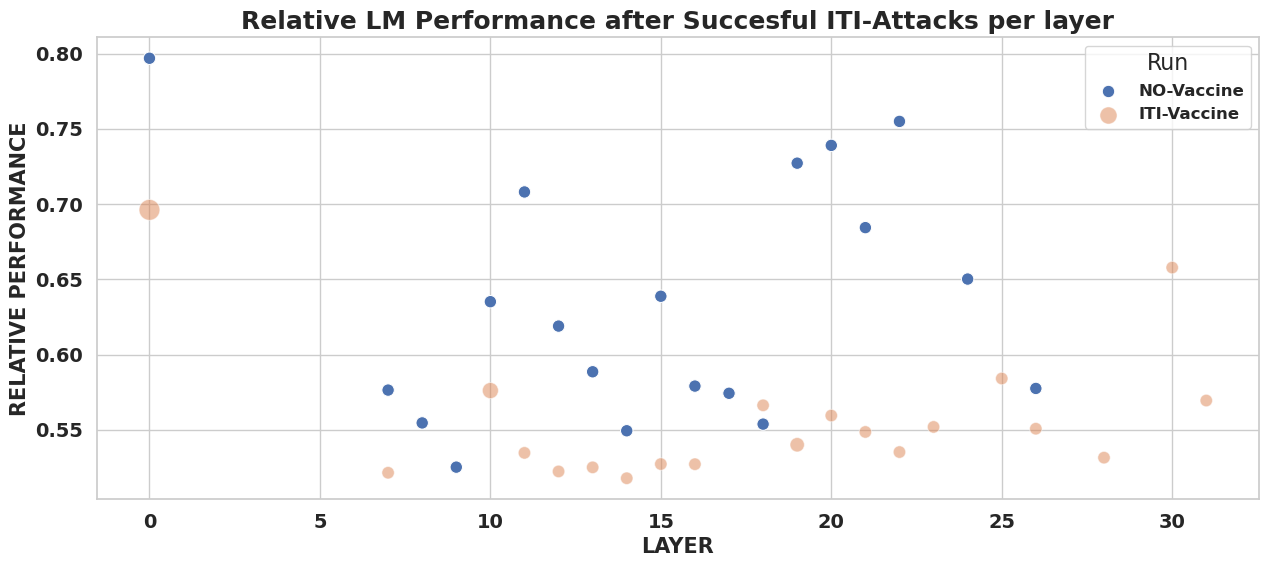

In [70]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in perf_results_df['name'].unique():
    subset = perf_results_df[perf_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative LM Performance after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Toxicity:

In [71]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
iti_vacc_toxicity.reset_index(inplace=True)
iti_vacc_toxicity_df = iti_vacc_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
iti_vacc_toxicity_df['name'] = 'ITI-Vaccine'

In [73]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
baseline_toxicity.reset_index(inplace=True)
baseline_toxicity_df = baseline_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_toxicity_df['name'] = 'NO-Vaccine'

In [74]:
toxicity_results_df = pd.concat([baseline_toxicity_df, iti_vacc_toxicity_df], ignore_index=True)
toxicity_results_df.columns = ['layer', 'count', 'mean_toxicity', 'name']

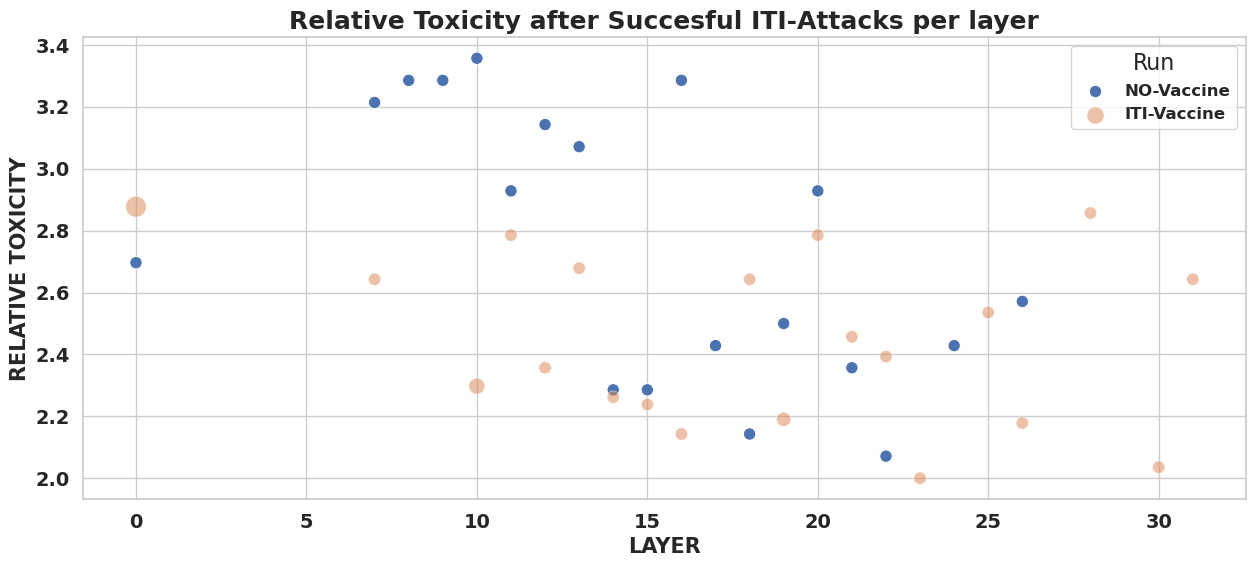

In [75]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in toxicity_results_df['name'].unique():
    subset = toxicity_results_df[toxicity_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_toxicity',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative Toxicity after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE TOXICITY', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# OTHER:

In [305]:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

In [265]:
omni = pd.read_csv('results/performance_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

In [266]:
run_to_analyze = 'REFT_VACCINE_52'

In [277]:
columns_to_drop = [col for col in omni.columns if not run_to_analyze in col]
run_ds = omni.drop(columns = columns_to_drop)
run_ds[run_to_analyze + ' - IMMUNIZING_LAYER'].ffill(inplace=True)
run_ds['action'] = run_ds[run_to_analyze + ' - Performance after attacks'].notna().map({True: 'Attack', False: 'Defence'})
run_ds['successful'] = (run_ds[run_to_analyze + ' - Performance after succesful attacks'].notna() \
 | run_ds[run_to_analyze + ' - Performance after succesful defences'].notna())
run_ds['vaccine'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
columns_to_drop = [col for col in run_ds.columns if 'succesful' in col or 'Absorbed' in col]
run_ds = run_ds.drop(columns = columns_to_drop)
run_ds.columns = ['layer',
       'attack performance',
       'defence performance', 
       'action',
       'successful',
       'vaccine']

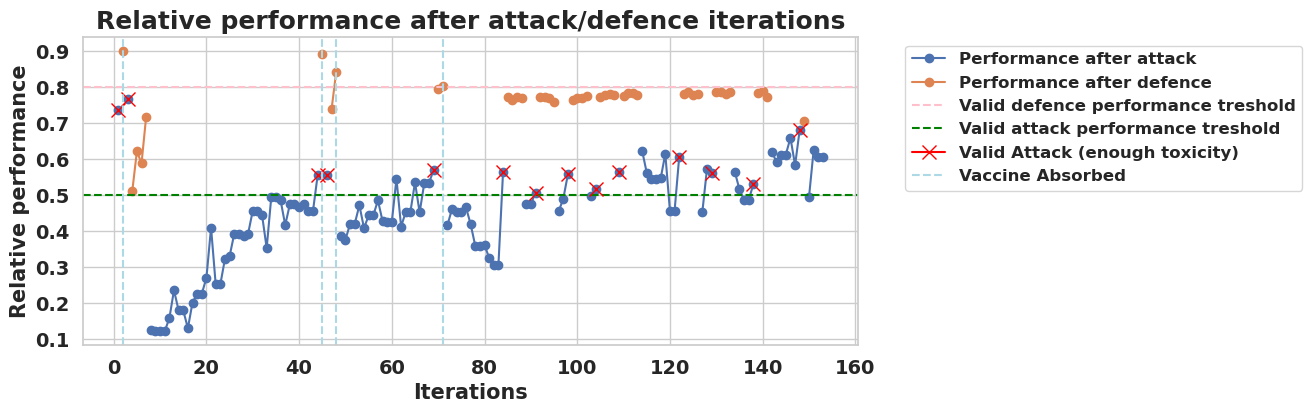

In [320]:
# Create the line plot
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed
plt.plot(run_ds['attack performance'], marker='o', linestyle='-', label='Performance after attack')

plt.plot(run_ds['defence performance'], marker='o', linestyle='-', label='Performance after defence')

plt.axhline(y=0.8, color='pink', linestyle='dashed', linewidth=1.5, 
            label='Valid defence performance treshold')

plt.axhline(y=0.5, color='green', linestyle='dashed', linewidth=1.5, 
            label='Valid attack performance treshold')

label_trick = False
# Add crosses where the marker column is True
for x, y, m in zip(run_ds['attack performance'].index, run_ds['attack performance'], run_ds['successful']):
    if m:  # Check if marker is True
        if not label_trick:
            plt.plot(x, y, marker='x', markersize=10, color='red', 
                     label='Valid Attack (enough toxicity)')  # Plot cross
            label_trick = True
        else:
            plt.plot(x, y, marker='x', markersize=10, color='red')  # Plot cross

label_trick = False
# Add crosses and vertical lines where the marker column is True
for x, p, m in zip(run_ds['vaccine'].index, run_ds['defence performance'], run_ds['vaccine']):
    if m:
        if not label_trick:
            plt.axvline(x=x, linestyle='--', color='lightblue', label='Vaccine Absorbed')  # Add vertical line
            label_trick = True
        else:
            plt.axvline(x=x, linestyle='--', color='lightblue')  # Add vertical line

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.xlabel('Iterations', fontdict=axis_font_dict)
plt.ylabel('Relative performance', fontdict=axis_font_dict)
plt.title('Relative performance after attack/defence iterations', fontdict=title_font_dict)
plt.legend(
    prop=legend_font_dict,
    bbox_to_anchor=(1.05, 1),
    loc='upper left')

plt.show()

# other:

In [189]:
absortions_df = pd.read_csv('results/absortions.csv')

In [190]:
columns_to_drop = [col for col in absortions_df.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
absortions_df.drop(columns=columns_to_drop, inplace=True)
absortions_df.set_index('STEP', inplace=True)

In [194]:
absortions_df.columns = [col_name.split(' -')[0] for col_name in absortions_df.columns]

In [195]:
for col_name, col_values in absortions_df.items():
    print('Run Name:\n', col_name)
    print(f'Absorved LoRA Defender Projections:\n{list(col_values.dropna())}\n')

Run Name:
 REFT_VACCINE_52
Absorved LoRA Defender Projections:
[1.0, 11.0, 11.0, 16.0]

Run Name:
 REFT_VACCINE_134
Absorved LoRA Defender Projections:
[1.0, 1.0, 8.0, 12.0, 13.0, 20.0]

Run Name:
 REFT_VACCINE_34
Absorved LoRA Defender Projections:
[1.0, 1.0, 1.0, 8.0]

Run Name:
 REFT_VACCINE_77_TRIS
Absorved LoRA Defender Projections:
[1.0, 1.0]



In [178]:
toxicities_df = pd.read_csv('results/all_toxicities.csv')

In [179]:
columns_to_drop = [col for col in toxicities_df.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
toxicities_df.drop(columns=columns_to_drop, inplace=True)
toxicities_df.set_index('STEP', inplace=True)

In [180]:
toxicities_df.columns = [col_name.split(' -')[0] for col_name in toxicities_df.columns]

In [181]:
# retrocompat:
init_toxicity = 0.28


def abs_to_rel_toxicity(abs_toxicity):
    return abs_toxicity / init_toxicity


toxicities_df['REFT_VACCINE'] = toxicities_df['REFT_VACCINE'].apply(abs_to_rel_toxicity)
toxicities_df['BASELINE'] = toxicities_df['BASELINE'].apply(abs_to_rel_toxicity)

## LAYER INFO:

In [209]:
merged_df = pd.DataFrame({'Toxicity': values.dropna(), 'Absorbed': absortions_df[run_name].dropna()})

In [210]:
merged_df

,Toxicity,Absorbed
STEP,,
1,2.785714,NaN
2,NaN,1.0
3,3.428571,NaN
8,2.857143,NaN
9,3.500000,NaN
...,...,...
148,2.071429,NaN
150,1.857143,NaN
151,1.071429,NaN


Run Name:
 REFT_VACCINE_52
Attacks and vaccines:
STEP
2       1.000000
45     11.000000
48     11.000000
71     16.000000
1       2.785714
         ...    
148     2.071429
150     1.857143
151     1.071429
152     1.357143
153     1.357143
Length: 115, dtype: float64



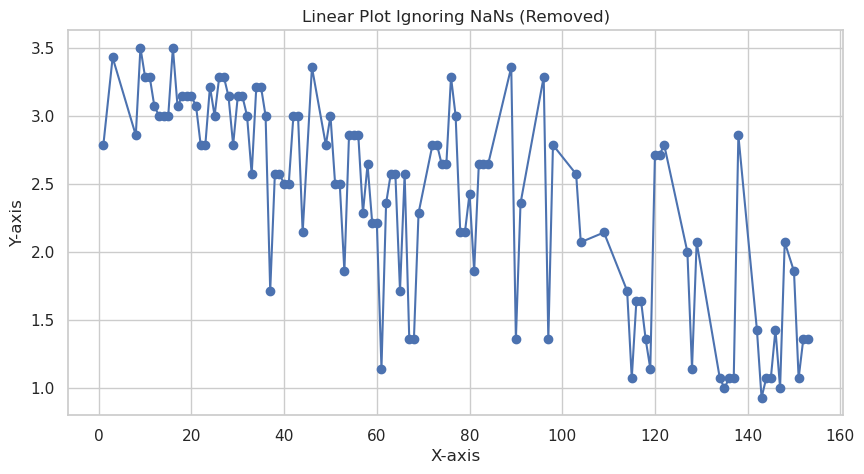

Run Name:
 REFT_VACCINE_134
Attacks and vaccines:
STEP
2       1.000000
5       1.000000
36      8.000000
54     12.000000
60     13.000000
         ...    
150     2.000000
152     1.428571
153     1.071429
154     0.928571
155     0.928571
Name: REFT_VACCINE_134, Length: 124, dtype: float64



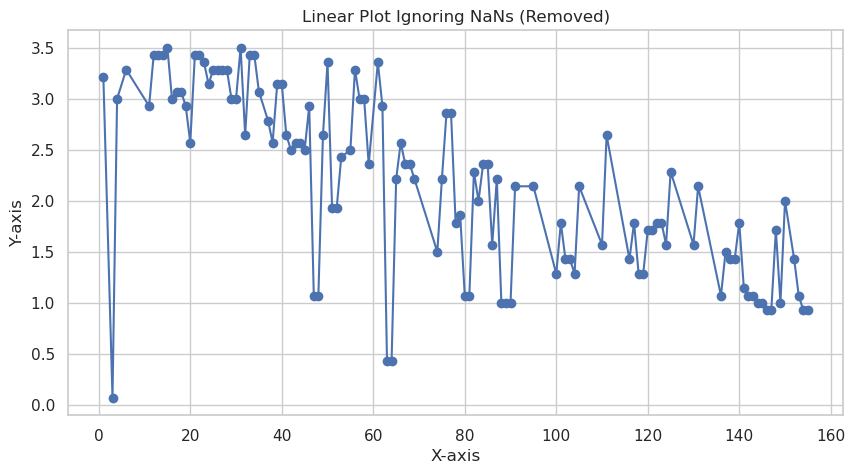

Run Name:
 REFT_VACCINE_34
Attacks and vaccines:
STEP
2      1.000000
5      1.000000
8      1.000000
44     8.000000
1      2.857143
         ...   
145    1.142857
146    1.642857
147    1.642857
148    2.500000
149    2.642857
Name: REFT_VACCINE_34, Length: 121, dtype: float64



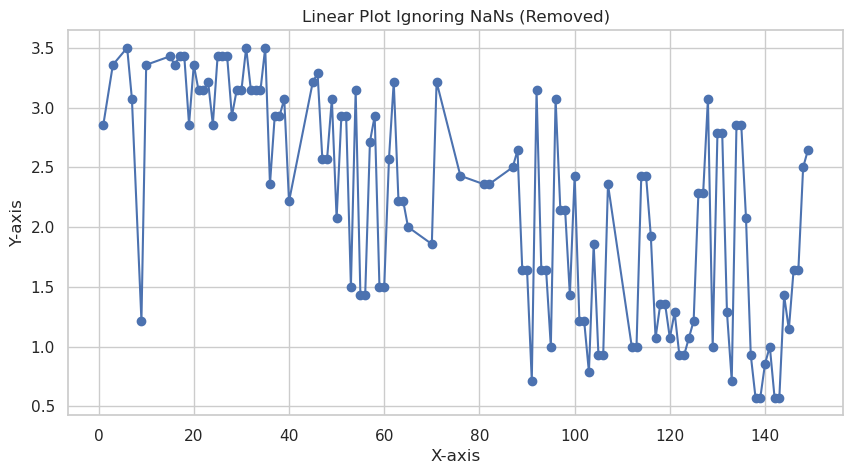

Run Name:
 REFT_VACCINE_77_TRIS
Attacks and vaccines:
STEP
4      1.000000
9      1.000000
1      1.714286
2      2.071429
5      3.500000
         ...   
146    1.571429
147    1.642857
148    1.714286
149    1.571429
150    1.571429
Name: REFT_VACCINE_77_TRIS, Length: 110, dtype: float64



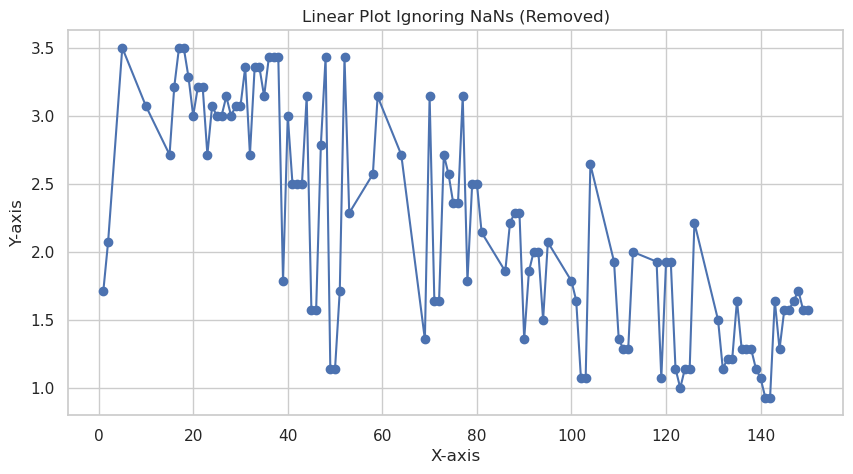

In [211]:
for run_name, values in toxicities_df.items():

    if 'BASELINE' not in run_name and run_name != 'REFT_VACCINE':

        print('Run Name:\n', run_name)
        # print(f'Succesful attacks:\n{values.dropna()}\n')

        # print(f'Absortions:\n{absortions_df[run_name].dropna()}\n')
        attacks_and_vaccines = pd.concat([
            absortions_df[run_name].dropna(),
            values.dropna()])

        print(f'Attacks and vaccines:\n{attacks_and_vaccines}\n')

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(values.dropna().index, values.dropna().values, marker='o', linestyle='-', color='b')
        plt.title('Linear Plot Ignoring NaNs (Removed)')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()


In [136]:
toxicities_df

,REFT_VACCINE_52 - TOXICITY_AFTER_ATTACK,BASELINE_134 - TOXICITY_AFTER_ATTACK,REFT_VACCINE_134 - TOXICITY_AFTER_ATTACK,BASELINE_34 - TOXICITY_AFTER_ATTACK,REFT_VACCINE_34 - TOXICITY_AFTER_ATTACK,BASELINE_77_TRIS - TOXICITY_AFTER_ATTACK,REFT_VACCINE_77_TRIS - TOXICITY_AFTER_ATTACK,REFT_VACCINE - TOXICITY_AFTER_ATTACK,BASELINE - TOXICITY_AFTER_ATTACK
0,2.785714,3.214286,3.214286,2.857143,2.857143,1.714286,1.714286,0.92,0.74
1,NaN,3.357143,NaN,3.357143,NaN,2.071429,2.071429,NaN,0.94
2,3.428571,3.142857,0.071429,3.142857,3.357143,2.428571,NaN,NaN,0.88
3,NaN,3.500000,3.000000,3.500000,NaN,3.142857,NaN,NaN,0.98
4,NaN,3.500000,NaN,3.500000,NaN,3.500000,3.500000,NaN,0.98
...,...,...,...,...,...,...,...,...,...
150,1.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,1.357143,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN
152,1.357143,NaN,1.071429,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,0.928571,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in perf_results_df['name'].unique():
    subset = perf_results_df[perf_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative LM Performance after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()
